In [1]:
# Importing essentials libraries

from keras.layers import *
from keras.models import Sequential, Model
from keras import optimizers
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report

import numpy as np
import pandas as pd
import os

Using TensorFlow backend.


In [2]:
# Intializing the Datagen

datagen=ImageDataGenerator(validation_split=0.1,rescale=1./255)

# Getting the classes

classes_name = os.listdir('../Dataset/Devnagiri/Images/')

# Creating training data
train_generator = datagen.flow_from_directory('../Dataset/Devnagiri/Images/',
                                              classes=classes_name,
                                              color_mode='grayscale',
                                              subset='training',
                                              target_size=(32,32),
                                              batch_size=200)

# Creating validation data
val_generator = datagen.flow_from_directory('../Dataset/Devnagiri/Images/',
                                            classes=classes_name,
                                            color_mode='grayscale',
                                            subset='validation',
                                            target_size=(32,32),
                                            batch_size=200)


Found 82800 images belonging to 46 classes.
Found 9200 images belonging to 46 classes.


In [3]:
# Intialization of model
model = Sequential()

# Adding layer 1
model.add(Conv2D(filters=30,padding='same',activation='relu',kernel_size=(3,3),input_shape=(32,32,1)))
model.add(Conv2D(filters=15,padding='same',activation='relu',kernel_size=(3,3)))
model.add(MaxPooling2D(padding='same'))

# Adding layer 2
model.add(Conv2D(filters=15,padding='same',activation='relu',kernel_size=(3,3)))
model.add(Conv2D(filters=30,padding='same',activation='relu',kernel_size=(3,3)))
model.add(AveragePooling2D(padding='same'))

# Flattening of data
model.add(Flatten())

# Adding dense layer 1
model.add(Dropout(0.5))
model.add(Dense(units=1380,activation='relu'))

# Adding dense layer 2
model.add(Dropout(0.2))
model.add(Dense(units=690,activation='relu'))

# Adding output layer
model.add(Dropout(0.1))
model.add(Dense(units=46,activation='softmax'))

# Compiling model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [4]:
# Model Summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 30)        300       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 15)        2040      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 30)        4080      
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)             

In [5]:
history = model.fit_generator(train_generator,epochs=6,steps_per_epoch=460,validation_data=val_generator)

Epoch 1/6
460/460 [==============================] - 205s 446ms/step - loss: 0.7230 - accuracy: 0.7922 - val_loss: 0.4468 - val_accuracy: 0.8513
Epoch 2/6
460/460 [==============================] - 209s 455ms/step - loss: 0.1986 - accuracy: 0.9382 - val_loss: 0.2984 - val_accuracy: 0.8793
Epoch 3/6
460/460 [==============================] - 215s 467ms/step - loss: 0.1279 - accuracy: 0.9594 - val_loss: 0.3035 - val_accuracy: 0.8940
Epoch 4/6
460/460 [==============================] - 208s 453ms/step - loss: 0.0977 - accuracy: 0.9691 - val_loss: 0.4235 - val_accuracy: 0.9063
Epoch 5/6
460/460 [==============================] - 205s 446ms/step - loss: 0.0793 - accuracy: 0.9741 - val_loss: 0.4432 - val_accuracy: 0.9116
Epoch 6/6
460/460 [==============================] - 214s 464ms/step - loss: 0.0655 - accuracy: 0.9786 - val_loss: 0.4248 - val_accuracy: 0.9097


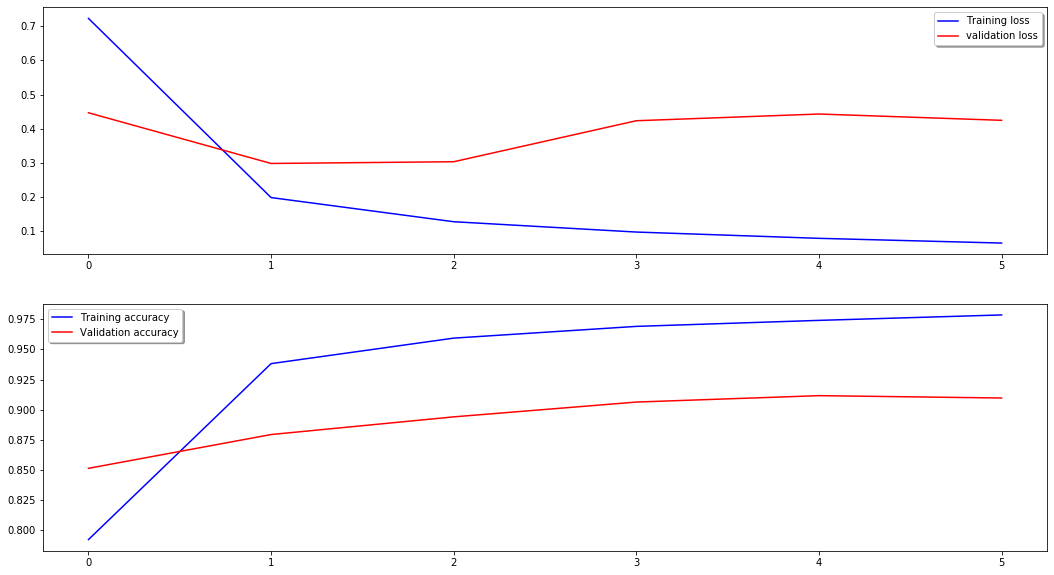

In [6]:
# Plot the loss and accuracy curves for training and validation 

fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [7]:
# Max Validation Accuracy
print('Max Validation Accuracy =',max(history.history['val_accuracy'])*100,'%')

Max Validation Accuracy = 91.16304516792297 %


In [9]:
model.save('devnagri.h5')